In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


In [3]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [4]:
# Checking the outbreaks_df data frame for missing data
print(outbreaks_df.count());

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64


In [5]:
# Checking for correct data types
print(outbreaks_df.dtypes);

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object


# Everett's Part

<BarContainer object of 18 artists>

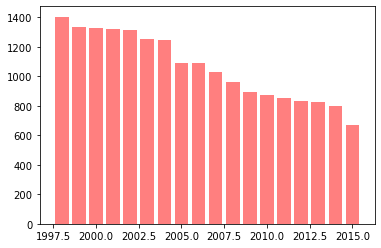

In [6]:
plt.bar(outbreaks_df["Year"].unique(), outbreaks_df["Year"].value_counts(), color='r', alpha=0.5, align="center")

In [42]:
Noro_df = outbreaks_df[outbreaks_df["Species"]=="Norovirus genogroup I"]
Noro_year_series = Noro_df["Year"].value_counts()
Salm_df = outbreaks_df[outbreaks_df["Species"]=="Salmonella enterica"]
Salm_year_series = Salm_df["Year"].value_counts()
Salm_year_df = Salm_year_series.to_frame()
Ind_Salm = Salm_year_df.sort_index()
Noro_2_df = outbreaks_df[outbreaks_df["Species"]=='Norovirus genogroup II']
Noro_2 = Noro_2_df["Year"].value_counts().to_frame().sort_index()
Noro_unk_df = outbreaks_df[outbreaks_df["Species"]=="Norovirus unknown"]
Noro_unk = Noro_unk_df["Year"].value_counts().to_frame().sort_index()
unk_cleaning = pd.DataFrame({"Year": [0]}, index = [1999])
Noro_unk_cleaned = Noro_unk.append(unk_cleaning).sort_index()
Clos_df = outbreaks_df[outbreaks_df["Species"]=="Clostridium perfringens"]
Clos_ind = Clos_df["Year"].value_counts().to_frame().sort_index()

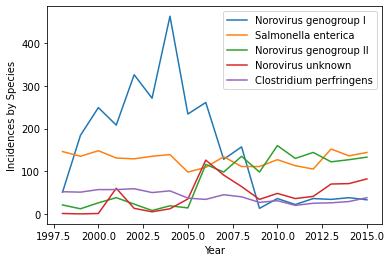

In [43]:
Noro_year_df = Noro_year_series.to_frame()
Indexed_Noro_year_df  = Noro_year_df.sort_index()
x_axis = Indexed_Noro_year_df.index
plt.plot(x_axis, Indexed_Noro_year_df["Year"])
plt.plot(x_axis, Ind_Salm["Year"])
plt.plot(x_axis, Noro_2["Year"])
plt.plot(x_axis, Noro_unk_cleaned["Year"])
plt.plot(x_axis, Clos_ind["Year"])
plt.xlabel("Year")
plt.ylabel("Incidences by Species")
plt.legend(['Norovirus genogroup I', 'Salmonella enterica', 'Norovirus genogroup II','Norovirus unknown', 'Clostridium perfringens'], loc='upper right')
plt.show()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x22bbe7056c8>,
 [Text(-0.28286091472257374, -1.0630097379244976, 'Top 5 Species'),
  Text(0.28286091472257385, 1.0630097379244976, 'Other')],
 [Text(-0.1542877716668584, -0.5798234934133623, '64%'),
  Text(0.15428777166685845, 0.5798234934133623, '36%')])

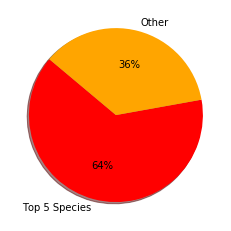

In [82]:
pie_labels = ["Top 5 Species", "Other"]
sizes = [cont_frame.head(5).sum(), cont_frame.sum() - cont_frame.head(5).sum()]
colors = ["red", "orange"]
plt.pie(sizes, labels=pie_labels, colors=colors, shadow=True, autopct='%1.0f%%', startangle=140)

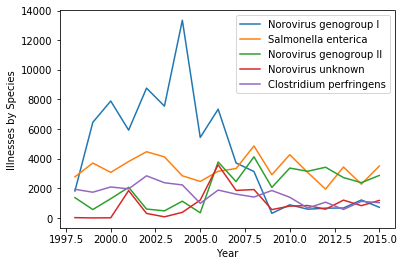

In [83]:
Noro_ill = Noro_df.groupby(["Year"]).sum()["Illnesses"].to_frame()
plt.plot(x_axis, Noro_ill["Illnesses"])
Salm_ill = Salm_df.groupby(["Year"]).sum()["Illnesses"].to_frame()
plt.plot(x_axis, Salm_ill["Illnesses"])
Noro_2_ill = Noro_2_df.groupby(["Year"]).sum()["Illnesses"].to_frame()
plt.plot(x_axis, Noro_2_ill["Illnesses"])
Noro_unk_ill = Noro_unk_df.groupby(["Year"]).sum()["Illnesses"].to_frame()
unk_cleaning_1 = pd.DataFrame({"Illnesses": [0]}, index = [1999])
Noro_unk_cleaned_1 = Noro_unk_ill.append(unk_cleaning_1).sort_index()
plt.plot(x_axis, Noro_unk_cleaned_1["Illnesses"])
Clos_ill = Clos_df.groupby(["Year"]).sum()["Illnesses"].to_frame()
plt.plot(x_axis, Clos_ill["Illnesses"])
plt.xlabel("Year")
plt.ylabel("Illnesses by Species")
plt.legend(['Norovirus genogroup I', 'Salmonella enterica', 'Norovirus genogroup II','Norovirus unknown', 'Clostridium perfringens'], loc='upper right')
plt.show()

# Dinh's Part

In [7]:
species_list = outbreaks_df["Species"].unique()
len(species_list)

202

In [8]:
#dinh
virus_df = outbreaks_df

In [9]:
virus_df = virus_df['Species'].dropna()
virus_df

3                Scombroid toxin
4            Salmonella enterica
5                Shigella boydii
7            Salmonella enterica
8                          Virus
                  ...           
19113    Clostridium perfringens
19114     Norovirus genogroup II
19115     Norovirus genogroup II
19116     Norovirus genogroup II
19117     Norovirus genogroup II
Name: Species, Length: 12500, dtype: object

In [10]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [11]:
virus_df.count()

12500

In [12]:
virus_df.value_counts()

Norovirus genogroup I                                            2744
Salmonella enterica                                              2303
Norovirus genogroup II                                           1424
Norovirus unknown                                                 790
Clostridium perfringens                                           732
                                                                 ... 
Norovirus genogroup II; Salmonella enterica                         1
Campylobacter jejuni; Escherichia coli, Shiga toxin-producing       1
Campylobacter; Cryptosporidium                                      1
Norovirus unknown; Salmonella enterica                              1
Salmonella enterica; Yersinia enterocolitica                        1
Name: Species, Length: 201, dtype: int64

In [13]:
virus_df = outbreaks_df.groupby('Species').filter(lambda x : len(x)>500)
virus_df = virus_df['Species'].value_counts()
virus_df

Norovirus genogroup I      2744
Salmonella enterica        2303
Norovirus genogroup II     1424
Norovirus unknown           790
Clostridium perfringens     732
Staphylococcus aureus       532
Name: Species, dtype: int64

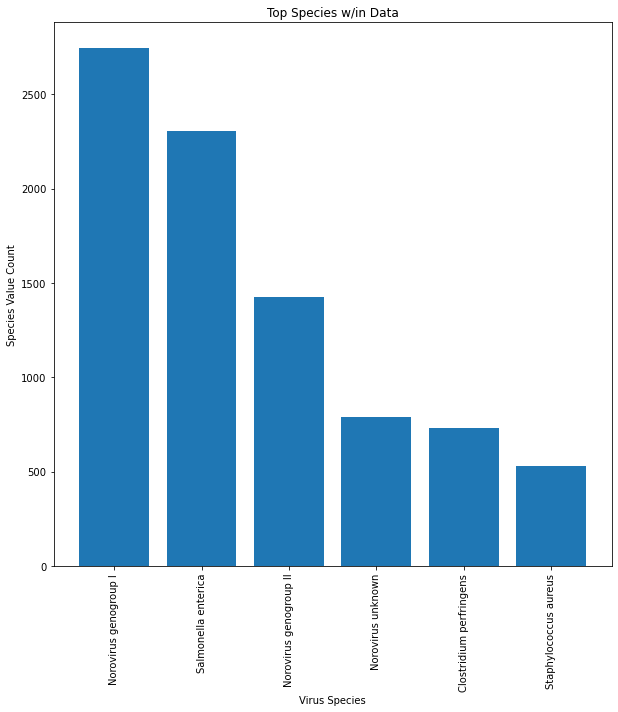

In [14]:
virus_series = virus_df
virus_frame = virus_series.to_frame()
virus_frame = virus_frame.head(20)
plt.figure(figsize=(10, 10))
plt.bar(virus_frame.index, virus_frame["Species"])
plt.title('Top Species w/in Data')
plt.ylabel('Species Value Count')
plt.xlabel('Virus Species')
plt.xticks(rotation='vertical')
plt.savefig("SpeciesOcc.png", bbox_inches="tight")
plt.show()

In [15]:
#Dinh Summary: The top virus count would be Norovirus virus species. 
#Individually they make up a rather large percentage of the total virus species within the data. 
#Together as they are from the same family they are the most abundant when it comes to foodborne viruses 

In [16]:

food_df = outbreaks_df
food_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [17]:

food_df['Food'].count()

10156

In [18]:
food_df = food_df[['Food','Species']].dropna()
food_df

,Food,Species
3,"Fish, Ahi",Scombroid toxin
4,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica
7,"Stuffing, Unspecified; Sandwich, Turkey",Salmonella enterica
8,"Salad, Unspecified",Virus
9,"Peppers, Chili",Virus
...,...,...
19105,Meal Replacement Powder,Salmonella enterica
19108,Foie Gras,Campylobacter unknown
19111,"Cookies, Chocolate Chip",Norovirus genogroup II
19113,"Gravy, Pork",Clostridium perfringens


In [19]:

food_df = outbreaks_df.groupby('Food').filter(lambda x : len(x)>100)

food_df['Food'].value_counts()


Multiple Foods            206
Oysters, Raw              165
Ground Beef, Hamburger    127
Salad, Unspecified        118
Chicken, Unspecified      105
Name: Food, dtype: int64

In [20]:
food_df['Species'].value_counts()

Norovirus genogroup I                                                               136
Salmonella enterica                                                                  58
Vibrio parahaemolyticus                                                              54
Escherichia coli, Shiga toxin-producing                                              45
Norovirus genogroup II                                                               36
Norovirus unknown                                                                    27
Staphylococcus aureus                                                                18
Bacillus cereus; Clostridium perfringens                                             12
Virus                                                                                11
Norovirus                                                                            11
Clostridium perfringens                                                              10
Chemical or toxin               

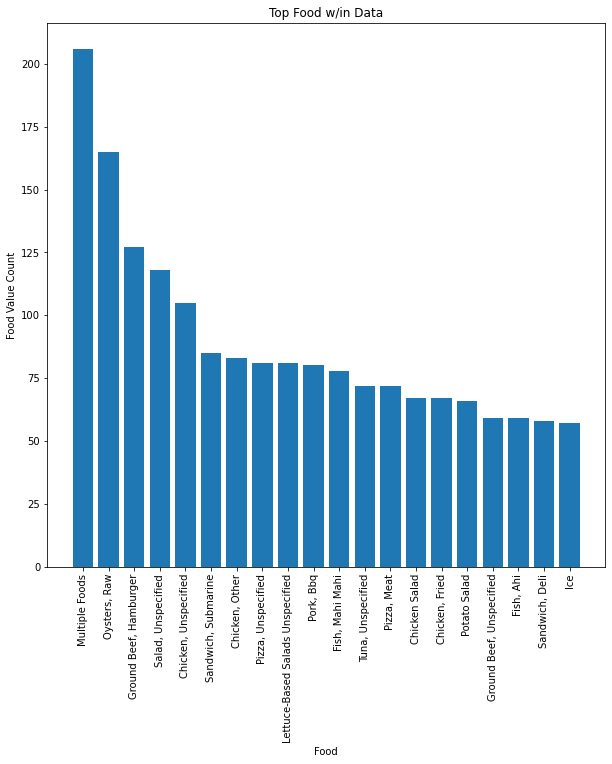

In [21]:

food_series = outbreaks_df['Food'].value_counts()
food_frame = food_series.to_frame()
food_frame = food_frame.head(20)
plt.figure(figsize=(10, 10))
plt.bar(food_frame.index, food_frame["Food"])
plt.title('Top Food w/in Data')
plt.ylabel('Food Value Count')
plt.xlabel('Food')
plt.xticks(rotation='vertical')
plt.savefig('FoodOcc.png', bbox_inches='tight')
plt.show()

In [22]:
outbreaks_df['Food'].value_counts()

Multiple Foods                                             206
Oysters, Raw                                               165
Ground Beef, Hamburger                                     127
Salad, Unspecified                                         118
Chicken, Unspecified                                       105
                                                          ... 
Grains, Other                                                1
Malai Kofta                                                  1
Chicken, Unspecified; Pie, Merengue                          1
Guacamole; Sour Cream                                        1
Banana, Unspecified; Cantaloupe; Pineapple, Unspecified      1
Name: Food, Length: 3127, dtype: int64

In [23]:
#Dinh Summary: The top food value count after dropna would be Multiple Foods but this result leaves alot to be desired as it is too general to narrow down what types of food (i.e cake, lasagna etc) are linked to illnesses and viruses.
#If we leave Multiple Foods out then we can see that raw oysters occur 165 times followed by ground beef(hamburgers) with 127, salad with 118, and chicken with 105. We can then say that eating the top five foods will result in a
# consumer falling ill or becoming infected with one of the listed viruses. But we also have to take into account that this bar graph does not take into account every instance that occurs from 1998-2015

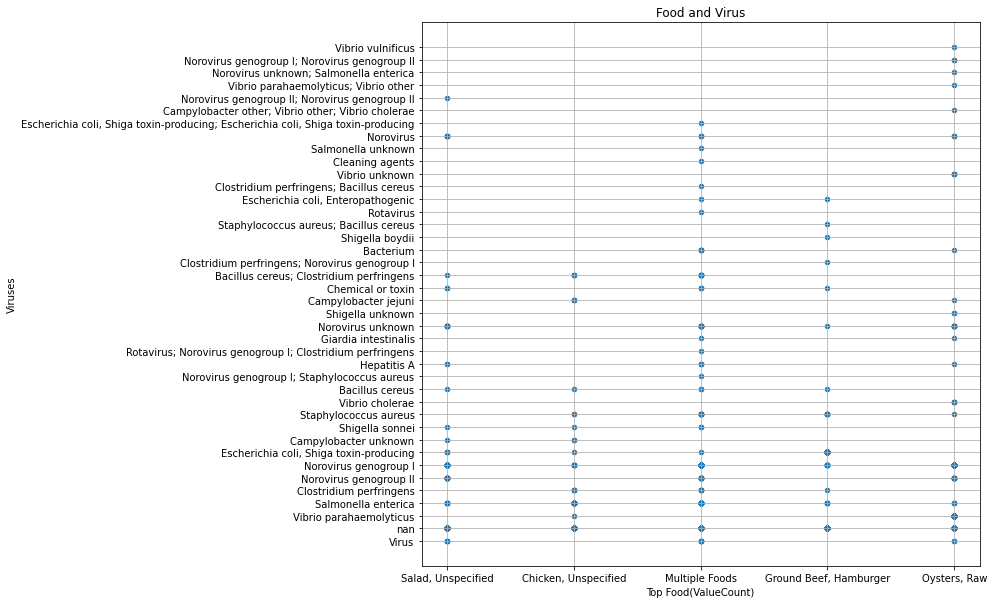

In [24]:
food_df = food_df.astype(str)
food_df.plot(kind="scatter", x='Food', y='Species', grid=True,figsize=(10,10), title="Food and Virus")
plt.ylabel('Viruses')
plt.xlabel('Top Food(ValueCount)')
plt.savefig('FoodaVirus.png', bbox_inches='tight')
plt.show()

In [25]:
#Dinh Summary: This 'scatter' graph was made in an attemp to show the viruses that are associated with the top value count foods. Here we can see that amongst the top foods, Multiple Foods is linked to 24 virus types if we exclude nan
# with raw oysters being a close second with it being linked to 20 virus species. If we consider multiple foods then it would be a geuss from the current data whether a combination or a single food was the cause of the virus
# While if we exclude Multiple Foods and focus on the 2nd highest being raw oysters then we can summarize that raw oysters are breeding grounds for a plethora of viruses and this can be infered to be cause by unsanitary practices 

In [26]:
foodvirus = outbreaks_df

In [27]:
foodill = foodvirus.groupby('Species')['Illnesses']

foodill

In [28]:
foodill = outbreaks_df.groupby(["Food"]).sum()["Illnesses"].sort_values(ascending=False).to_frame().head(10)

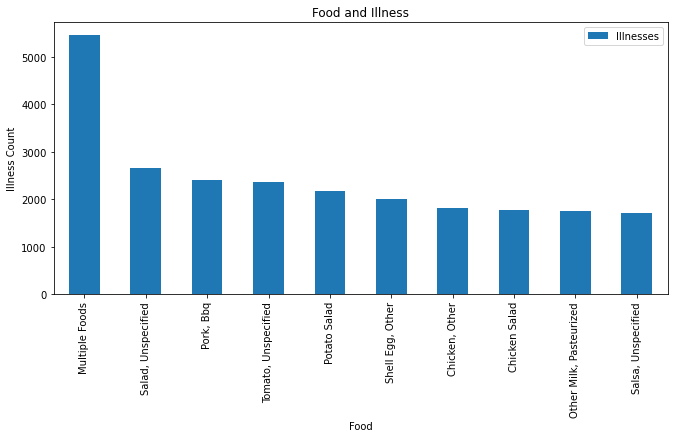

<Figure size 432x288 with 0 Axes>

In [29]:

foodill.plot(kind="bar", figsize=(11,5))
plt.title("Food and Illness")
plt.ylabel('Illness Count')
plt.savefig('FoodaIllness(Bar)', bbox_inches='tight')
plt.show()
plt.tight_layout()

In [30]:
#Dinh Summary: Taking into account all instances of foods from 1998 to 2015 and comparing it to illness count
#we can see that the result is different the bargraphs with dropna. Here we can see that from 1998-2015 Multiple Foods still remains the top and we
# can see that salad now ranks second followed by pork, tomatoes, potato salad and so on. This point to once again unclean practices resulting in a high illness count and we can infer that having a dish made of multiple foods
# can result in a higher chance of contracting an illness though the link to one specific type may not be apparent. 

In [31]:
foodill

,Illnesses
Food,
Multiple Foods,5451
"Salad, Unspecified",2650
"Pork, Bbq",2401
"Tomato, Unspecified",2356
Potato Salad,2177
"Shell Egg, Other",1994
"Chicken, Other",1825
Chicken Salad,1770
"Other Milk, Pasteurized",1744


In [32]:
foodv = outbreaks_df.groupby(["Species"]).sum()["Illnesses"].sort_values(ascending=False).to_frame().head(10)

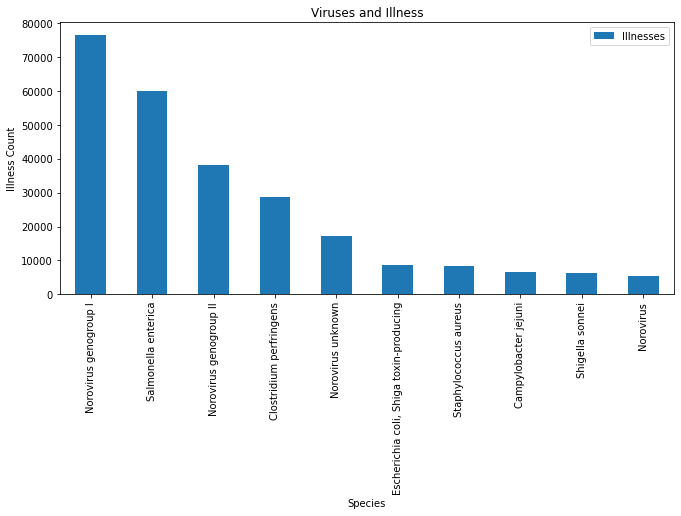

<Figure size 432x288 with 0 Axes>

In [33]:

foodv.plot(kind="bar", figsize=(11,5))

plt.title("Viruses and Illness")
plt.ylabel('Illness Count')
plt.savefig('Virus&Ill(Bar).png', bbox_inches='tight')
plt.show()
plt.tight_layout()

In [34]:
#Dinh Summary: Norovirus family takes up the majority of the illness count from 1998-2015. This means that norovirus is more likely to be prevalent or can be assume to be the leading cause of food borne illnesses with
#salmonella being a close second if we only consider the noroviruses as distinct from one another(ie. genogroup I, genogroup II, etc). 

In [35]:
foodv

,Illnesses
Species,
Norovirus genogroup I,76406
Salmonella enterica,60018
Norovirus genogroup II,38175
Clostridium perfringens,28734
Norovirus unknown,17181
"Escherichia coli, Shiga toxin-producing",8719
Staphylococcus aureus,8409
Campylobacter jejuni,6438
Shigella sonnei,6236


# Merari's Part

## Hospitalization Vs. Fatality

In [36]:
#Grouping the data by state
states_group = outbreaks_df.groupby('State')

In [37]:
# Number of Hospitalizations per state
hosp_state = states_group['Hospitalizations'].sum();

# Number of deaths per state
death_count = states_group['Fatalities'].sum();

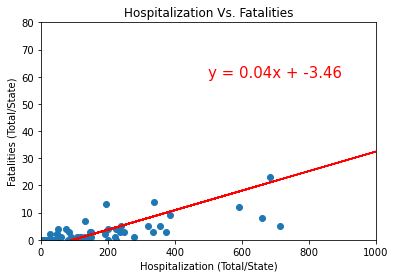

In [38]:
# Investigating correlation between Fatalities and Hospitalizations (Consider Doing Total Hopitalization Vs. Total Fatalities)
plt.scatter(hosp_state , death_count)
plt.title('Hospitalization Vs. Fatalities');
plt.xlabel('Hospitalization (Total/State)')
plt.ylabel('Fatalities (Total/State)')
plt.xlim((0,1000))
plt.ylim((0 , 80))
(m , b , rval , pval , stderr) = st.linregress(hosp_state , death_count);
hosp_death_line = f'y = {round(m , 2)}x + {round(b , 2)}';
plt.annotate(hosp_death_line , (500 , 60) , fontsize = 15 , color = 'red');
regress_val = m * hosp_state + b;
plt.plot(hosp_state , regress_val , color = 'red');



In [39]:
coeff_p  = st.pearsonr(hosp_state , death_count)
print(f'The pearson coefficient for Hospitalization Vs. Fatalities is {round(coeff_p[0] , 2)}')

The pearson coefficient for Hospitalization Vs. Fatalities is 0.97


### Correlation
* Large Pearson Coefficient denotes strong positive association between Hospitalization and Fatality rates
* Low P-value confirms that we can accept our alternate hypothesis H1 with low chance of rejecting the null hypothesis H0 when it is in fact true
* Intuitively , this makes sense since people are usually admitted to hospitals due to serious circumstances which unfortuneately includes the potential of expiration

However we must remember using one feature to predict fatalities is flawed because:
* It does not account for severity of hospital admission
* Does not incorporate the lethality of a specific contaminant (ie: E.coli)

## States with the most Fatalities and Hospitalizations

Text(0.5, 1.0, 'Fatalities per State')

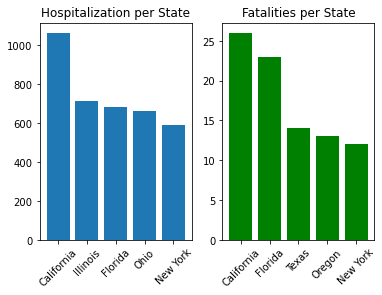

In [40]:
# Narrowing it down to the 5 states with the most 

#6 state values with the most hospitalizations
top_hosp = hosp_state.sort_values(ascending=False).head(6);

#6 state values with the most deaths
top_deaths = death_count.sort_values(ascending=False).head(6);

#Filtering out multistate label for both hospitalization and deaths
top_hosp = top_hosp.drop(labels = 'Multistate')

top_deaths = top_deaths.drop(labels = 'Multistate')


# #Plotting bar charts of 5 states with most Hospitalizatons | Fatalities
fig, (bar1 , bar2) = plt.subplots(1,2)

#Formatting for the first bar chart


bar1.bar(x = top_hosp.index , height = top_hosp)
plt.setp(bar1.get_xticklabels(), rotation=45 )
bar1.set_title('Hospitalization per State')


bar2.bar(x = top_deaths.index , height = top_deaths , color = 'green')
plt.setp(bar2.get_xticklabels(), rotation=45)
bar2.set_title('Fatalities per State')


* California is the leader in both categories
* Having a high hospitalization count does not guarantee that it will have a high fatality rate (Illinois is not in the fatality graphic)
* Possible explanations: Differring health guidelines and standards across states?

## Top 5 Contaminants associated with Fatalities in California

    Hospitalization: Listed are our 

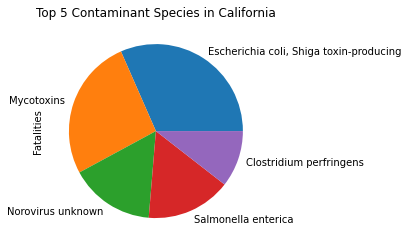

In [41]:
#Drilling down to a view of california outbreaks
cali_df = outbreaks_df[outbreaks_df['State'] == 'California'];

#Computing the 5 most common contaminants and plotting as a pie
cali_df.groupby('Species')['Fatalities'].sum().sort_values(ascending=False).head(5).plot.pie(title = 'Top 5 Contaminant Species in California')

* E.Coli responsible for the most deaths in california , Chipotle anyone?
* Mycotoxins (mold) is second
* Mycotoxins makes sense since it is easy to forget about food and let it grow some mold
* What foods are represented by a contamination of E.coli?